In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

# Replace 'YourFolder' with the name of your dataset folder
dataset_folder_path = '/content/drive/MyDrive/damaged_parts'
os.chdir(dataset_folder_path)


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import Image, display

In [ ]:
%cd /content/drive/MyDrive/damaged_parts

/content


In [ ]:
!ls

data.yaml  test  train


In [ ]:
%cd /content/drive/MyDrive/damaged_parts
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 158MB/s]
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

In [ ]:
!ls c

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1701881457.1926ed1cb71e.7141.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch465.jpg	weights
P_curve.png					    train_batch466.jpg
PR_curve.png					    train_batch467.jpg


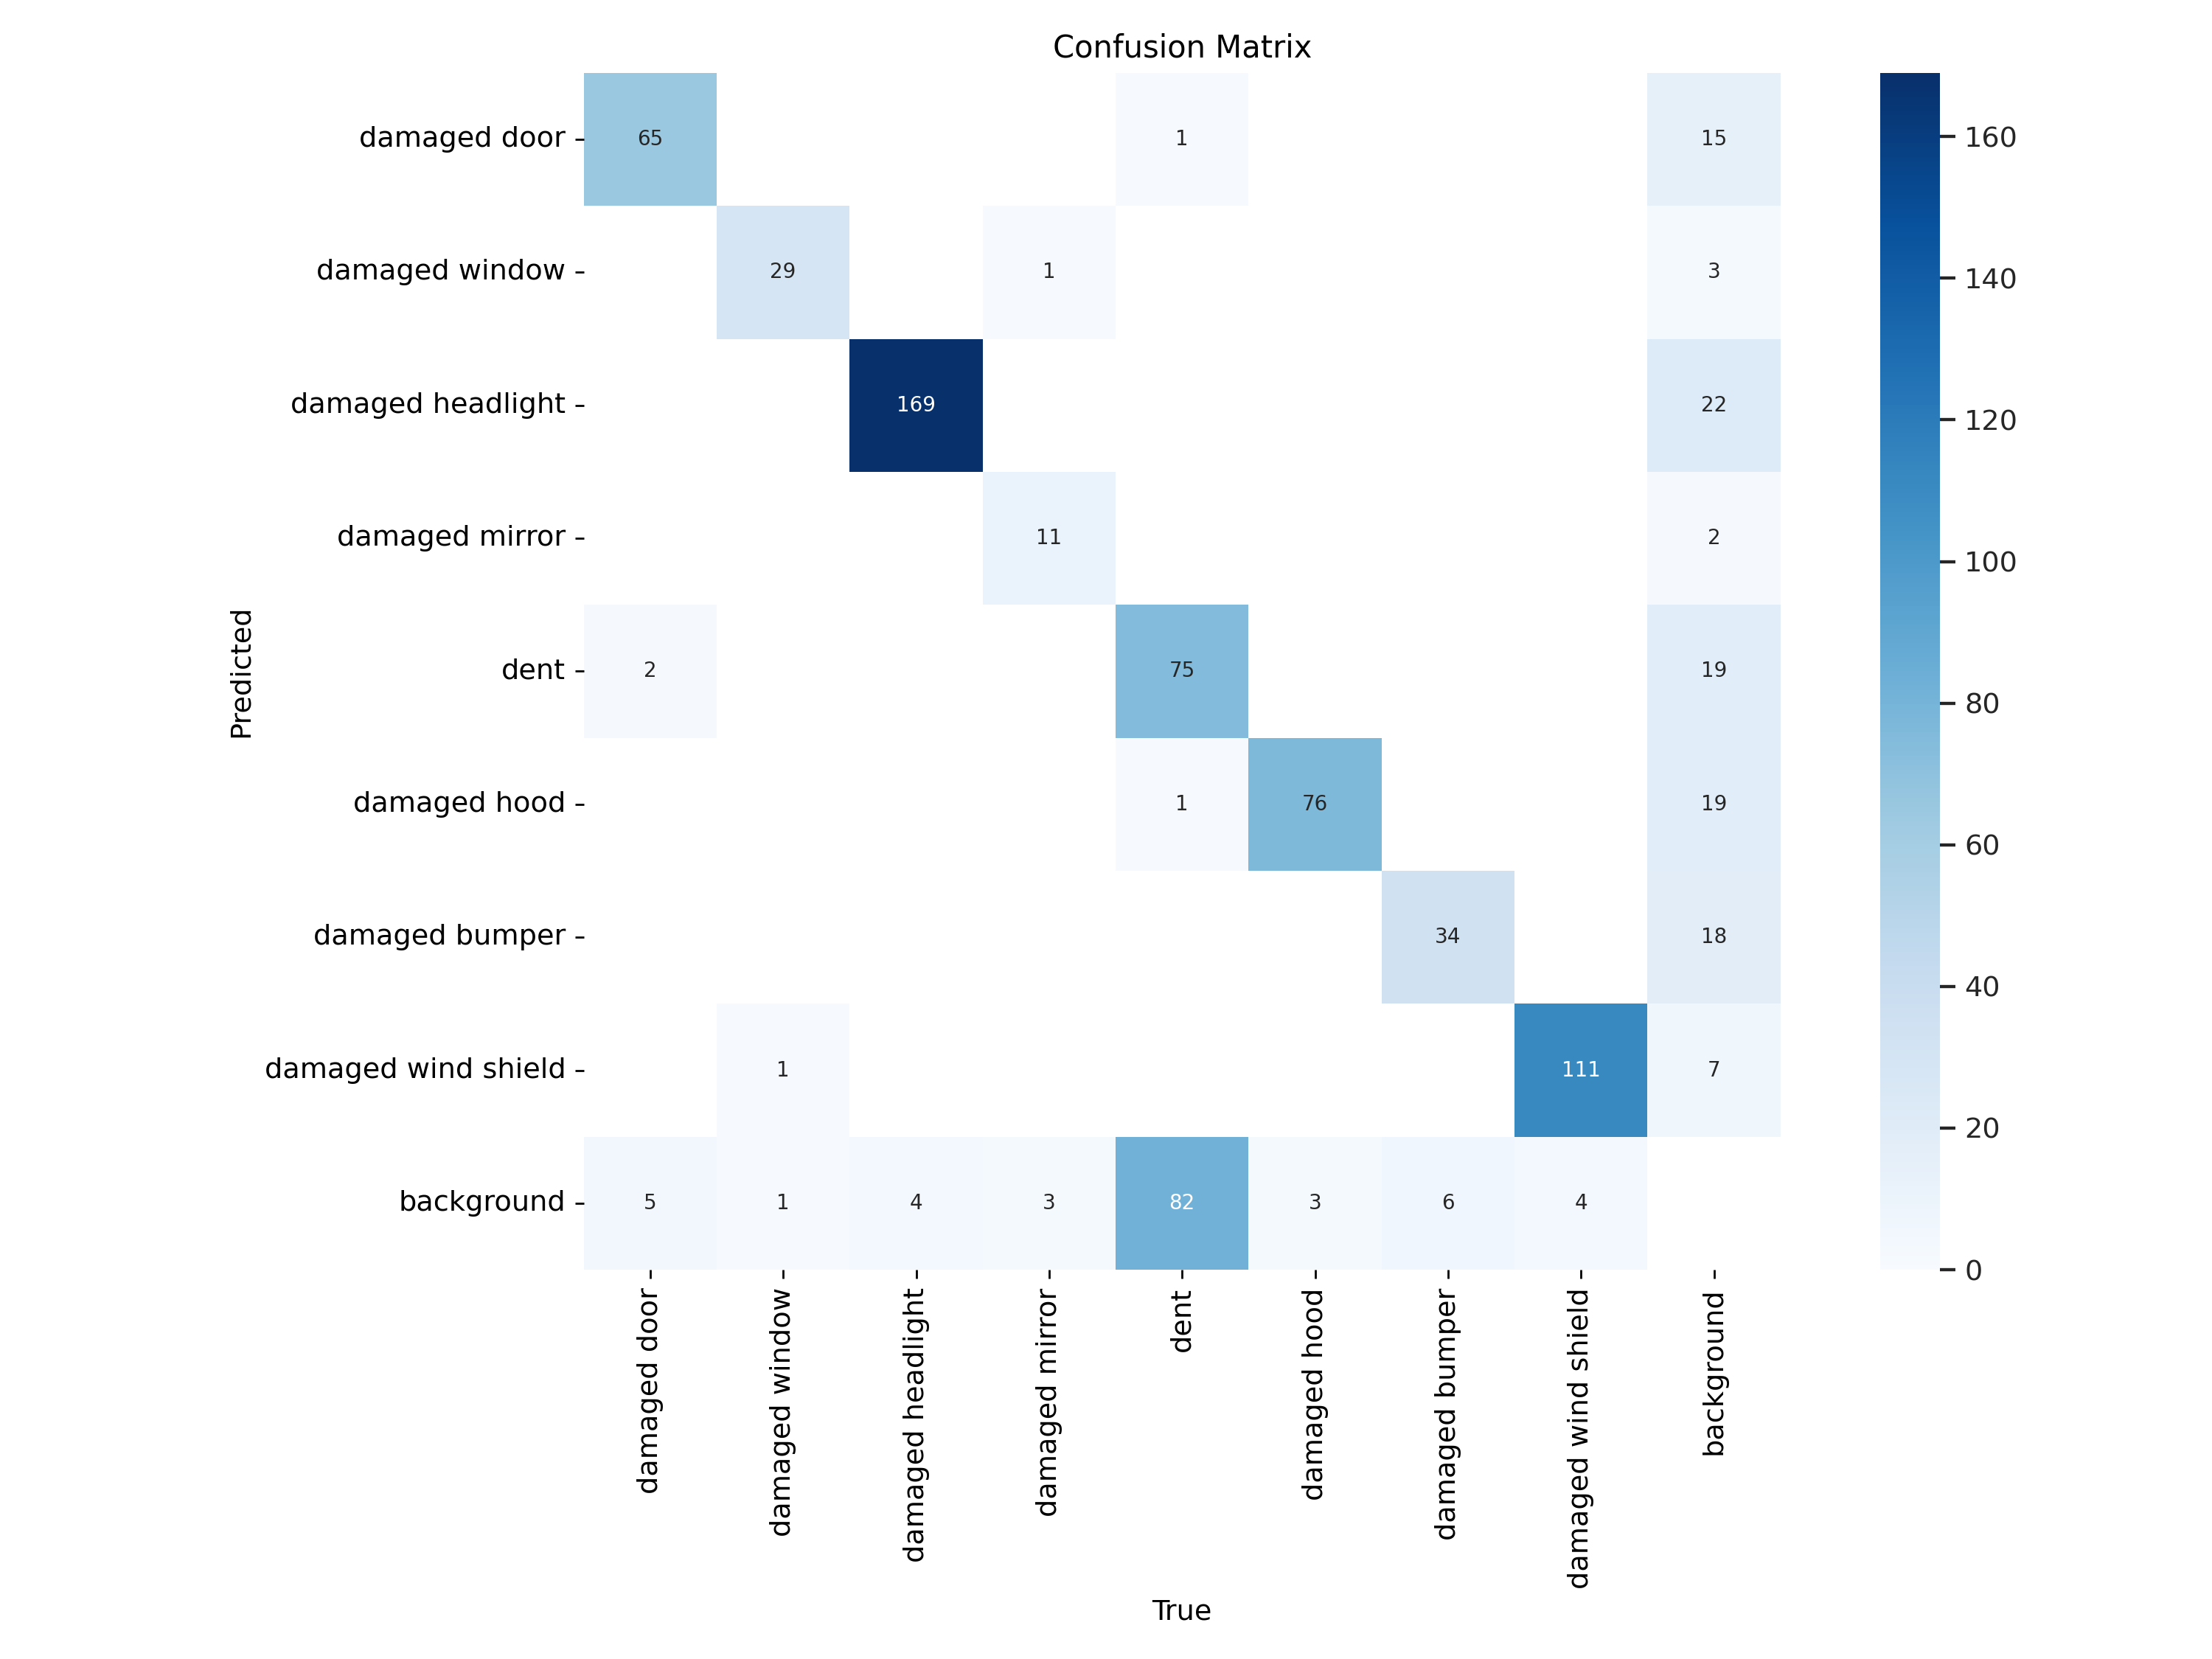

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

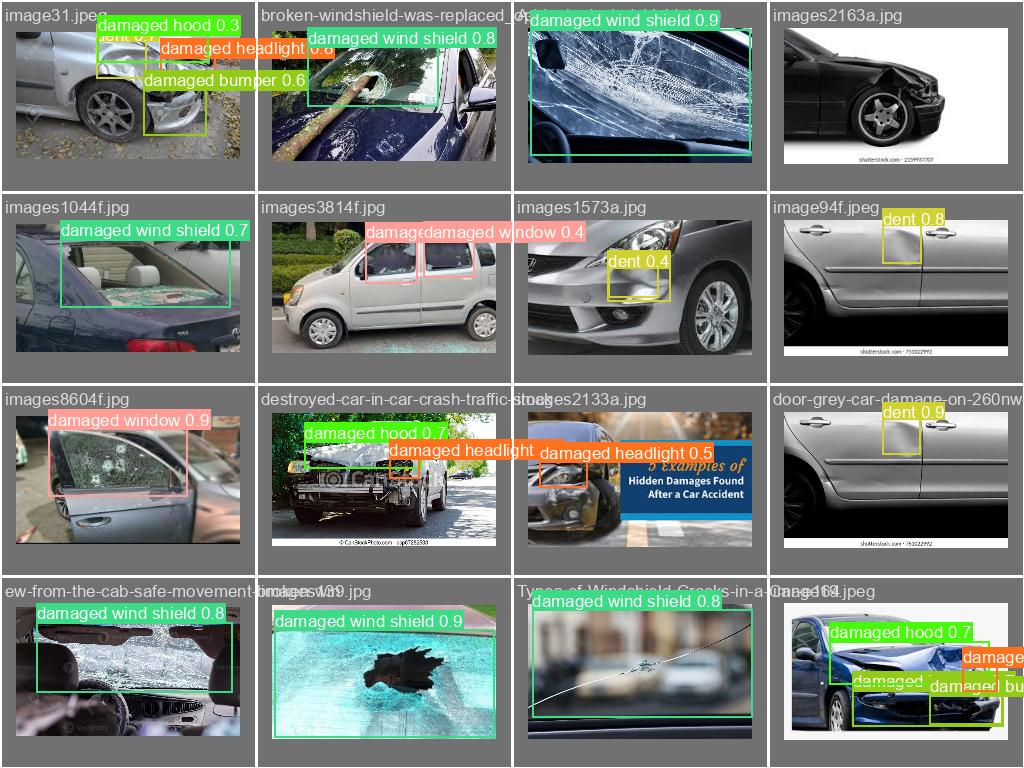

In [ ]:
Image(filename='runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/damaged_parts/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/damaged_parts/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100% 485/485 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:11<00:00,  2.66it/s]
                   all        485        684      0.863      0.828      0.873      0.623
          damaged door        485         72      0.833      0.833      0.932       0.68
        damaged window        485         31      0.908      0.968       0.98      0.768
     damaged headlight        485        173      0.891      0.954      0.978      0.687
        damaged mirror        485         15      0.907        0.8      0.805      0.583
                  dent        485        159      0.846      0.414      0.539      0.298
          damaged hood        

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/damaged_parts/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/damaged_parts/test

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/485 /content/drive/MyDrive/damaged_parts/test/0.jpg: 224x224 2 damaged headlights, 1 damaged hood, 1 damaged bumper, 7.3ms
image 2/485 /content/drive/MyDrive/damaged_parts/test/1.jpg: 224x224 1 damaged wind shield, 8.1ms
image 3/485 /content/drive/MyDrive/damaged_parts/test/10.jpg: 224x224 1 damaged wind shield, 7.7ms
image 4/485 /content/drive/MyDrive/damaged_parts/test/100.jpg: 224x224 1 damaged wind shield, 8.0ms
image 5/485 /content/drive/MyDrive/damaged_parts/test/101.jpg: 224x224 1 damaged headlight, 1 damaged hood, 12.6ms
image 6/485 /content/drive/MyDrive/damaged_parts/test/102.jpg: 224x224 1 damaged headlight, 12.0ms
image 7/485 /content/drive/MyDrive/damaged_parts/test/103.jpg: 224x224 1 damaged door, 1 dent, 10.0ms
image 8/485 /content/drive/MyDrive/damaged_parts/test/104.jpg: 224x224 1 damaged headl

In [ ]:
#!ls /content/drive/MyDrive/damaged_parts/runs/detect/predict

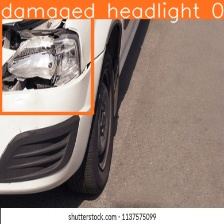

In [ ]:
Image(filename='/content/drive/MyDrive/damaged_parts/runs/detect/predict/2.jpg')

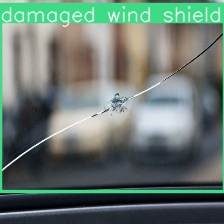

In [ ]:
Image(filename='/content/drive/MyDrive/damaged_parts/runs/detect/predict/100.jpg')

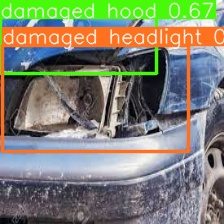

In [ ]:
Image(filename='/content/drive/MyDrive/damaged_parts/runs/detect/predict/25.jpg')

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/damaged_parts/runs/detect/train/weights/best.pt conf=0.25 source= https://www.autoauctionmall.com/learning-center/wp-content/uploads/2015/10/damaged-car-640x360.jpg

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

38.7kB [00:00, 11.5MB/s]
image 1/1 /content/drive/MyDrive/damaged_parts/damaged-car-640x360.jpg: 128x224 1 damaged headlight, 1 damaged hood, 92.4ms
Speed: 1.1ms preprocess, 92.4ms inference, 97.8ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


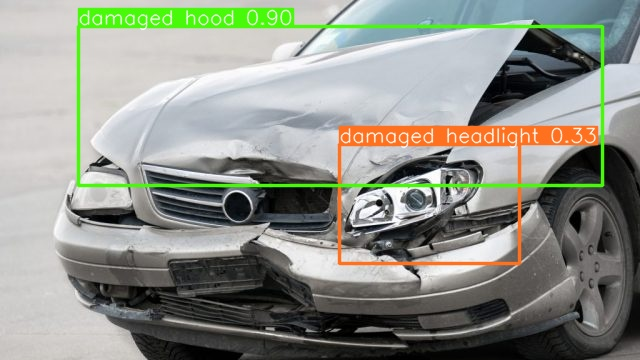

In [ ]:
Image(filename='/content/drive/MyDrive/damaged_parts/runs/detect/predict2/damaged-car-640x360.jpg')